In [ ]:
%tensorflow_version 1.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [ ]:
num_classes = 7
batch_size = 256
epochs = 10

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D 
from keras.layers import Dense, Activation, Dropout, Flatten

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
with open("fer2013.csv") as f: 
    
    content = f.readlines()
    lines = np.array(content) 
    num_of_instances = lines.size
    print("number of instances: ",num_of_instances) 
    print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [ ]:
x_train, y_train, x_test, y_test = [], [], [], [] #transfer train and test set data

for i in range(1,num_of_instances): 
    try:
        emotion, img, usage = lines[i].split(",") 
        val = img.split(" ")
        pixels = np.array(val, 'float32')
        emotion = keras.utils.to_categorical(emotion, num_classes) 
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels) 
        elif 'PublicTest' in usage:
            y_test.append(emotion) 
            x_test.append(pixels)
    except:
        print("",end="")

In [ ]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1) 
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples') 
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [ ]:
#construct CNN structure 
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2))) 
model.add(Flatten())
#fully connected neural networks
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.




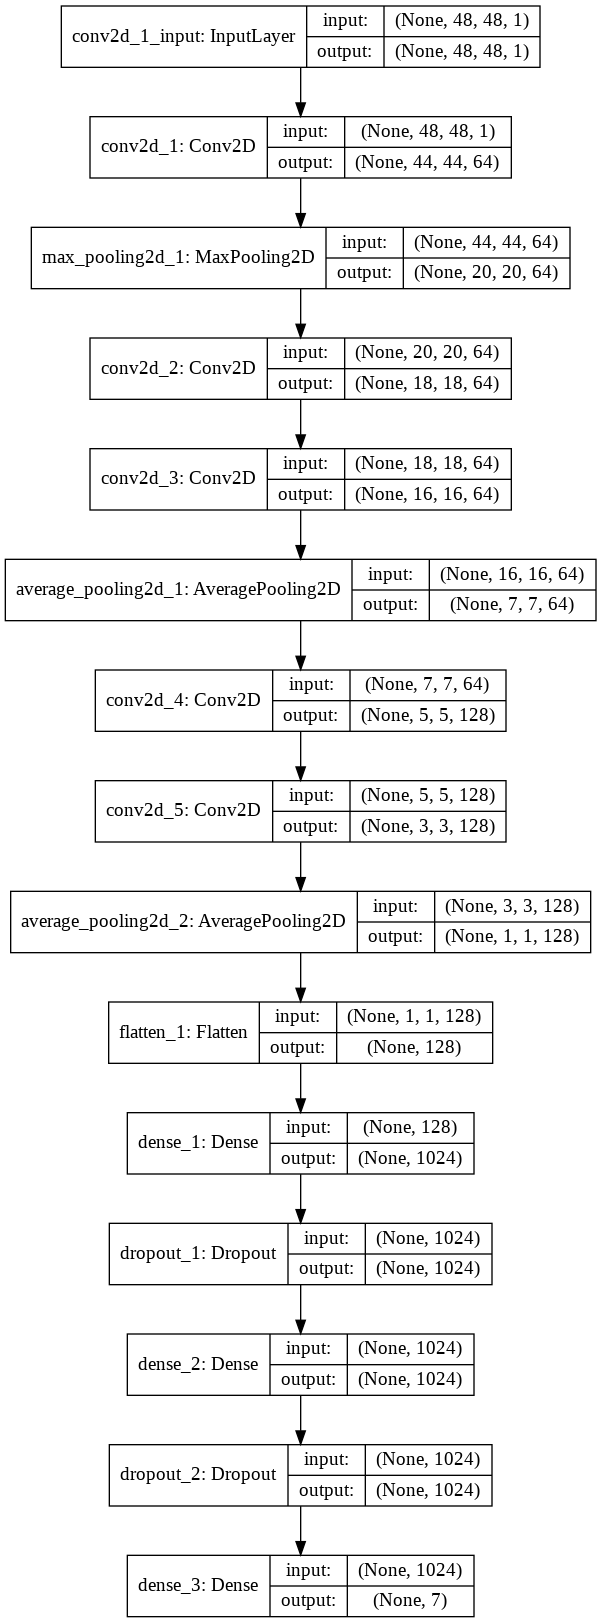

In [ ]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [ ]:
saver = tf.train.Saver()

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
#batch process
with tf.Session() as sess:
    sess.run(init)
    config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu sess = tf.Session(config=config)
    keras.backend.set_session(sess)

    gen = ImageDataGenerator()

    train_generator = gen.flow(x_train, y_train, batch_size=batch_size) 

    #------------------------------

    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'] ) 

    #------------------------------
    fit = True

    if fit == True:

        model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) 
    else:
        model.load_weights('facial_expression_model_weights.h5') 

    #------------------------------
    
    saver.save(sess,'./Face.ckpt')


Epoch 1/10
256/256 [==============================] - 431s 2s/step - loss: 1.7914 - accuracy: 0.2577
Epoch 2/10
256/256 [==============================] - 426s 2s/step - loss: 1.5701 - accuracy: 0.3778
Epoch 3/10
256/256 [==============================] - 427s 2s/step - loss: 1.3836 - accuracy: 0.4634
Epoch 4/10
256/256 [==============================] - 429s 2s/step - loss: 1.2743 - accuracy: 0.5125
Epoch 5/10
256/256 [==============================] - 429s 2s/step - loss: 1.1841 - accuracy: 0.5517
Epoch 6/10
256/256 [==============================] - 425s 2s/step - loss: 1.1149 - accuracy: 0.5793
Epoch 7/10
256/256 [==============================] - 430s 2s/step - loss: 1.0516 - accuracy: 0.6030
Epoch 8/10
256/256 [==============================] - 430s 2s/step - loss: 0.9859 - accuracy: 0.6324
Epoch 9/10
256/256 [==============================] - 429s 2s/step - loss: 0.9046 - accuracy: 0.6635
Epoch 10/10
256/256 [==============================] - 431s 2s/step - loss: 0.8386 - accur

In [ ]:
def emotion_analysis(emotions):

    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5) 
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage') 
    plt.title('emotion')

    plt.show()

In [ ]:
trainscore=[0,0.725564332008362]

In [ ]:
monitor_testset_results = False

with tf.Session() as sess:
    saver.restore(sess, './Face.ckpt')


    if monitor_testset_results == True: 
        predictions = model.predict(x_test)
        index = 0

        for i in predictions:

            if index < 30 and index >= 20:

                testing_img = np.array(x_test[index], 'float32') 
                testing_img = testing_img.reshape([48, 48]);
                plt.gray()
                plt.imshow(testing_img) 
                plt.show()
                print(i)
                emotion_analysis(i)
                print("	")
            index = index + 1

INFO:tensorflow:Restoring parameters from ./Face.ckpt


INFO:tensorflow:Restoring parameters from ./Face.ckpt


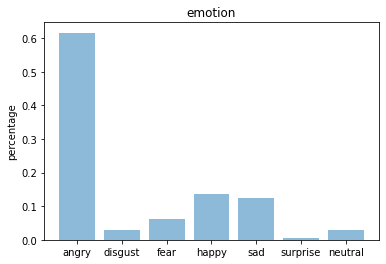

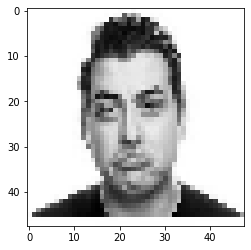

RuntimeError: ignored

In [ ]:
#make prediction for custom image out of test set
with tf.Session() as sess:
    saver.restore(sess, './Face.ckpt')
    img = image.load_img("angry.jpeg", color_mode="grayscale" , target_size=(48, 48))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0) 
    x /= 255
    custom = model.predict(x) 
    emotion_analysis(custom[0])

    x = np.array(x, 'float32') 
    x = x.reshape([48, 48]);

    plt.gray() 
    plt.imshow(x)
    plt.show()
    train_score=model.evaluate(x_train, y_train, verbose=0) 
    print('accuracy',100*train_score[1]) 
    
    sess.close()